In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [2]:
%run Statistics.ipynb

In [9]:
# For OptDiff
# Copy paste the following to
# https://sankeymatic.com/build/
# Width 1200 Height 600 Font size 26

"""
Generated programs [3545] Submitted programs
Generated programs [2045] Malformed diff

Submitted programs [1686] Accepted
Submitted programs [634] Compile errors
Submitted programs [669] Wrong answer
Submitted programs [338] Original solution not accepted
Submitted programs [66] Time limit exceeded
Submitted programs [7] Memory limit exceeded
Submitted programs [109] Runtime error
Submitted programs [36] Other

Accepted [356] Improved
"""

'\nGenerated programs [3545] Submitted programs\nGenerated programs [2045] Malformed diff\n\nSubmitted programs [1686] Accepted\nSubmitted programs [634] Compile errors\nSubmitted programs [669] Wrong answer\nSubmitted programs [338] Original solution not accepted\nSubmitted programs [66] Time limit exceeded\nSubmitted programs [7] Memory limit exceeded\nSubmitted programs [109] Runtime error\nSubmitted programs [36] Other\n\nAccepted [356] Improved\n'

Process all submissions:  25%|▎| 140/559 [00:01<00:0WARNING:root:Caught ValueError when processing ..\..\predictions\submissions-cf-000-999-gpt35\Codeforces\1420\93709414: CPU time for ..\..\predictions\submissions-cf-000-999-gpt35\Codeforces\1420\93709414\original_verdict.json is None
Process all submissions:  69%|▋| 385/559 [00:02<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\submissions-aizu-gpt35\Codenet\p00764\309188531: 'charmap' codec can't decode byte 0x8d in position 8633: character maps to <undefined>
Process all submissions:  72%|▋| 401/559 [00:02<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\submissions-aizu-gpt35\Codenet\p01128\731820531: 'charmap' codec can't decode byte 0x8d in position 8846: character maps to <undefined>
Process all submissions: 100%|█| 559/559 [00:04<00:0


Process all submissions:  22%|▏| 124/559 [00:00<00:0WARNING:root:Caught ValueError when processing ..\..\predictions\predicted_submissions\Codeforces\1420\93709414: CPU time for ..\..\predictions\predicted_submissions\Codeforces\1420\93709414\original_verdict.json is None
Process all submissions:  67%|▋| 376/559 [00:01<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\predicted_submissions\Codenet\p00764\309188531: 'charmap' codec can't decode byte 0x8d in position 8633: character maps to <undefined>
Process all submissions:  73%|▋| 407/559 [00:01<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\predicted_submissions\Codenet\p01128\731820531: 'charmap' codec can't decode byte 0x8d in position 8846: character maps to <undefined>
Process all submissions: 100%|█| 559/559 [00:02<00:0


Process all submissions:  25%|▎| 140/559 [00:01<00:0WARNING:root:Caught ValueError when processing ..\..\predictions\submissions-cf-cpp17-gpt4\Codeforces\1420\93709414: CPU time for ..\..\predictions\submissions-cf-cpp17-gpt4\Codeforces\1420\93709414\original_verdict.json is None
Process all submissions:  57%|▌| 317/559 [00:02<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\submissions-aizu-gpt4\Codenet\p00121\129361802: 'charmap' codec can't decode byte 0x81 in position 212: character maps to <undefined>
Process all submissions:  68%|▋| 378/559 [00:02<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\submissions-aizu-gpt4\Codenet\p00764\309188531: 'charmap' codec can't decode byte 0x8d in position 8633: character maps to <undefined>
Process all submissions:  73%|▋| 409/559 [00:02<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\submissions-aizu-gpt4\Codenet\p01128\731820531: 'charmap' codec can't decod

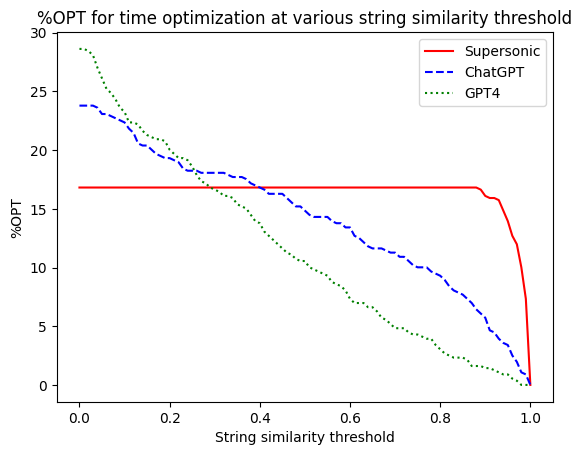

In [5]:
string_sim_thresholds = list(np.linspace(0, 1, 101))

codenet_problem_csv = Path('../../data/problem_list.csv')
problem_name_to_dataset = read_codenet_csv(codenet_problem_csv)
partitions = ['codeforces', 'aizu']

root_dirs = [Path('../../predictions/submissions-cf-gpt35/'), Path('../../predictions/submissions-aizu-gpt35/')]
all_submission_dir_generator = get_submission_dir_generator(root_dirs, partitions, problem_name_to_dataset)
(strictly_time_improvements, strictly_time_improvements_string_sims,
 strictly_memory_improvements, strictly_memory_improvements_string_sims) = compute_performance_statistics(all_submission_dir_generator, 'all', print_to_console=False)
chatgpt_time_opt = []
for string_sim_threshold in string_sim_thresholds:
    try:
        strictly_time_improvements_with_sim_threshold, _ = zip(*filter(
            lambda x: x[1] > string_sim_threshold,
            zip(strictly_time_improvements, strictly_time_improvements_string_sims)))
    except ValueError:
        strictly_time_improvements_with_sim_threshold = []
    try:
        strictly_memory_improvements_with_sim_threshold, _ = zip(*filter(
            lambda x: x[1] > string_sim_threshold,
            zip(strictly_memory_improvements, strictly_memory_improvements_string_sims)))
    except ValueError:
        strictly_memory_improvements_with_sim_threshold = []

    optimized_strictly_time_improvements = list(filter(lambda x: x > 0, strictly_time_improvements_with_sim_threshold))
    optimized_strictly_memory_improvements = list(filter(lambda x: x > 0, strictly_memory_improvements_with_sim_threshold))

    chatgpt_time_opt.append(len(optimized_strictly_time_improvements)*100/len(strictly_time_improvements))

    
root_dirs = [Path('../../predictions/supersonic_predicted_submissions/'), Path('../../predictions/supersonic_predicted_submissions/')]
all_submission_dir_generator = get_submission_dir_generator(root_dirs, partitions, problem_name_to_dataset)
(strictly_time_improvements, strictly_time_improvements_string_sims,
 strictly_memory_improvements, strictly_memory_improvements_string_sims) = compute_performance_statistics(all_submission_dir_generator, 'all', print_to_console=False)
optdiff_time_opt = []
for string_sim_threshold in string_sim_thresholds:
    try:
        strictly_time_improvements_with_sim_threshold, _ = zip(*filter(
            lambda x: x[1] > string_sim_threshold,
            zip(strictly_time_improvements, strictly_time_improvements_string_sims)))
    except ValueError:
        strictly_time_improvements_with_sim_threshold = []
    try:
        strictly_memory_improvements_with_sim_threshold, _ = zip(*filter(
            lambda x: x[1] > string_sim_threshold,
            zip(strictly_memory_improvements, strictly_memory_improvements_string_sims)))
    except ValueError:
        strictly_memory_improvements_with_sim_threshold = []

    optimized_strictly_time_improvements = list(filter(lambda x: x > 0, strictly_time_improvements_with_sim_threshold))
    optimized_strictly_memory_improvements = list(filter(lambda x: x > 0, strictly_memory_improvements_with_sim_threshold))

    optdiff_time_opt.append(len(optimized_strictly_time_improvements)*100/len(strictly_time_improvements))
    
    
root_dirs = [Path('../../predictions/submissions-cf-gpt4'), Path('../../predictions/submissions-aizu-gpt4/')]
all_submission_dir_generator = get_submission_dir_generator(root_dirs, partitions, problem_name_to_dataset)
(strictly_time_improvements, strictly_time_improvements_string_sims,
 strictly_memory_improvements, strictly_memory_improvements_string_sims) = compute_performance_statistics(all_submission_dir_generator, 'all', print_to_console=False)
gpt4_time_opt = []
for string_sim_threshold in string_sim_thresholds:
    try:
        strictly_time_improvements_with_sim_threshold, _ = zip(*filter(
            lambda x: x[1] > string_sim_threshold,
            zip(strictly_time_improvements, strictly_time_improvements_string_sims)))
    except ValueError:
        strictly_time_improvements_with_sim_threshold = []
    try:
        strictly_memory_improvements_with_sim_threshold, _ = zip(*filter(
            lambda x: x[1] > string_sim_threshold,
            zip(strictly_memory_improvements, strictly_memory_improvements_string_sims)))
    except ValueError:
        strictly_memory_improvements_with_sim_threshold = []

    optimized_strictly_time_improvements = list(filter(lambda x: x > 0, strictly_time_improvements_with_sim_threshold))
    optimized_strictly_memory_improvements = list(filter(lambda x: x > 0, strictly_memory_improvements_with_sim_threshold))

    gpt4_time_opt.append(len(optimized_strictly_time_improvements)*100/len(strictly_time_improvements))


plt.plot(string_sim_thresholds, optdiff_time_opt, '-', label ='Supersonic', color='red')
plt.plot(string_sim_thresholds, chatgpt_time_opt, '--', label ='ChatGPT', color='blue')
plt.plot(string_sim_thresholds, gpt4_time_opt, ':', label ='GPT4', color='green')

plt.xlabel("String similarity threshold")
plt.ylabel("%OPT")
plt.legend()
plt.title('%OPT for time optimization at various string similarity threshold')
plt.savefig('rq2_string_similarity_threshold.png', dpi=600)

Process all submissions:  23%|▏| 128/559 [00:00<00:0WARNING:root:Caught ValueError when processing ..\..\predictions\predicted_submissions\Codeforces\1420\93709414: CPU time for ..\..\predictions\predicted_submissions\Codeforces\1420\93709414\original_verdict.json is None
Process all submissions:  68%|▋| 381/559 [00:01<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\predicted_submissions\Codenet\p00764\309188531: 'charmap' codec can't decode byte 0x8d in position 8633: character maps to <undefined>
Process all submissions: 100%|█| 559/559 [00:02<00:0
Process all submissions:  25%|▏| 139/559 [00:01<00:0WARNING:root:Caught ValueError when processing ..\..\predictions\submissions-cf-000-999-gpt35\Codeforces\1420\93709414: CPU time for ..\..\predictions\submissions-cf-000-999-gpt35\Codeforces\1420\93709414\original_verdict.json is None
Process all submissions:  69%|▋| 383/559 [00:02<00:0WARNING:root:Caught UnicodeDecodeError when processing ..\..\predictions\su

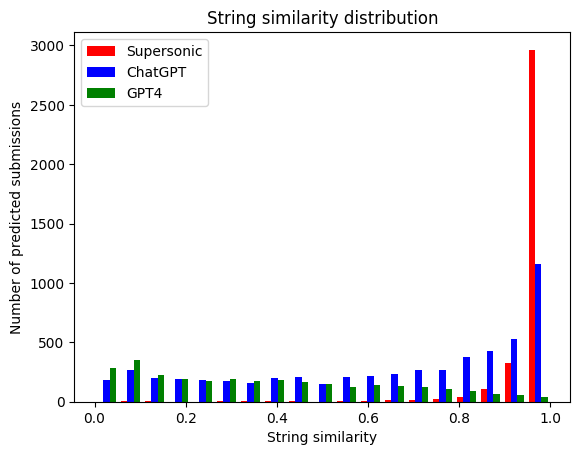

In [6]:
codenet_problem_csv = Path('../../data/problem_list.csv')
problem_name_to_dataset = read_codenet_csv(codenet_problem_csv)

partitions = ['codeforces', 'aizu']
root_dirs = [Path('../../predictions/supersonic_predicted_submissions/'), Path('../../predictions/supersonic_predicted_submissions/')]
all_submission_dir_generator = get_submission_dir_generator(root_dirs, partitions, problem_name_to_dataset)
optdiff_string_sims = compute_all_string_sims(all_submission_dir_generator)

root_dirs = [Path('../../predictions/submissions-cf-gpt35/'), Path('../../predictions/submissions-aizu-gpt35/')]
all_submission_dir_generator = get_submission_dir_generator(root_dirs, partitions, problem_name_to_dataset)
chatgpt_string_sims = compute_all_string_sims(all_submission_dir_generator)

root_dirs = [Path('../../predictions/submissions-cf-gpt4/'), Path('../../submissions-aizu-gpt4/')]
all_submission_dir_generator = get_submission_dir_generator(root_dirs, partitions, problem_name_to_dataset)
gpt4_string_sims = compute_all_string_sims(all_submission_dir_generator)

plt.style.use('seaborn-deep')

bins = np.linspace(0, 1, 20)

plt.hist([optdiff_string_sims, chatgpt_string_sims, gpt4_string_sims], bins, label=['Supersonic', 'ChatGPT', 'GPT4'], color=['red', 'blue', 'green'])
plt.legend(loc='upper left')
plt.xlabel('String similarity')
plt.ylabel('Number of predicted submissions')
plt.title('String similarity distribution')
plt.savefig('rq2_string_similarity_distribution.png', dpi=600)